In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("F:\\download\\train.csv")

In [3]:
test_df = pd.read_csv("F:\\download\\test.csv")

In [4]:
train_df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## put labels into y_train variable 
y_train = train_df['label']
## drop label column
x_train=train_df.drop(labels=['label'],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

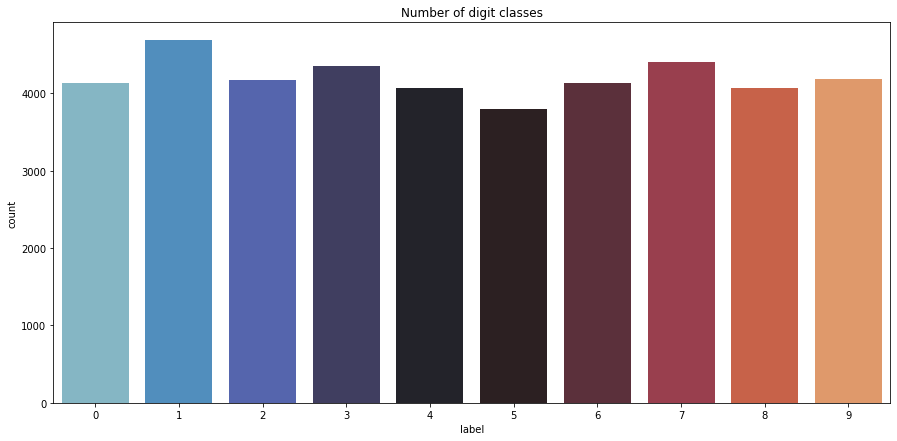

In [6]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
y_train.value_counts()

# Normalization, Reshape and Label Encoding
Normalization
We perform a grayscale normalization to reduce the effect of illumination's differences.
If we perform normalization, CNN works faster.
#Reshape
Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
#Label Encoding
Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [7]:
x_train= x_train/255.0
test_df = test_df/255.0

In [8]:
## reshape
x_train = x_train.values.reshape(-1,28,28,1)
test_df = test_df.values.reshape(-1,28,28,1)


In [9]:
## label encoding
from keras.utils.np_utils import to_categorical # convert to one hot encoding
y_train = to_categorical(y_train,num_classes = 10)

# train test split
 1.we split the data into train and test sets
 
 2.test size 10%
 
 3.train size 90%

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size =0.1,random_state = 2)

In [11]:
x_train.shape

(37800, 28, 28, 1)

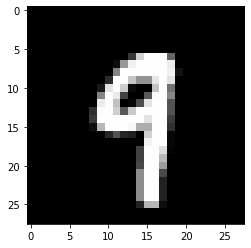

In [12]:
plt.imshow(x_train[2][:,:,0],cmap='gray')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [31]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

## define optimizer
 adam optimizer: change the learning rate

In [47]:
optimizer = Adam(lr = 0.001,beta_1=0.9,beta_2=0.999)

In [48]:
## comiple the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [49]:
epochs = 10
batch_size =250

## data argumentation
To avoid overfitting problem, we need to expand artificially our handwritten digit dataset

Alter the training data with small transformations to reproduce the variations of digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.


In [50]:
## data arumentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)
    

## fit the model

In [51]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size = batch_size),
                             epochs = epochs,validation_data = (x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size)

Epoch 1/10
151/151 [==============================] - 8s 49ms/step - loss: 1.1261 - accuracy: 0.6231 - val_loss: 0.2292 - val_accuracy: 0.9440
Epoch 2/10
151/151 [==============================] - 8s 54ms/step - loss: 0.4443 - accuracy: 0.8585 - val_loss: 0.1348 - val_accuracy: 0.9614
Epoch 3/10
151/151 [==============================] - 8s 55ms/step - loss: 0.3256 - accuracy: 0.8983 - val_loss: 0.1039 - val_accuracy: 0.9710
Epoch 4/10
151/151 [==============================] - 9s 57ms/step - loss: 0.2717 - accuracy: 0.9162 - val_loss: 0.0852 - val_accuracy: 0.9752
Epoch 5/10
151/151 [==============================] - 9s 59ms/step - loss: 0.2408 - accuracy: 0.9256 - val_loss: 0.0742 - val_accuracy: 0.9774
Epoch 6/10
151/151 [==============================] - 9s 57ms/step - loss: 0.2102 - accuracy: 0.9351 - val_loss: 0.0672 - val_accuracy: 0.9779
Epoch 7/10
151/151 [==============================] - 8s 55ms/step - loss: 0.2008 - accuracy: 0.9397 - val_loss: 0.0657 - val_accuracy: 0.9800